In [46]:
import random
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns 
import itertools
pd.options.mode.chained_assignment = None  # default='warn'

tom = [419, 398, 469.5, 463.5, 468.5, 490.5, 495, 493, 526, 477, 439.5, 493.5, 426, 521, 547.5, 471]
freewoe = [389.5, 428, 499, 550.5, 454, 490, 523.5, 467,516, 453.5, 494, 455.5, 546.5, 504.5, 426.5, 511.5]
ola = [316.5, 364.5,450, 451.5, 434.5, 436.5, 397.5, 387, 456, 423, 423, 464, 388, 401, 366, 454.5]
ham = [310, 450.5, 404, 338.5, 482, 419, 477, 471, 470, 328.5, 460.5, 472, 477.5, 422, 406, 461.5]
jaja = [447.5, 442.5, 356, 357.5, 435, 423, 423.5, 418.5, 523, 418.5, 449, 546, 426, 436, 452.5, 428]
cannon = [455.5, 439.5, 446.5, 539.5, 477, 421, 412.5, 481, 396.5, 381.5, 440.5, 435, 528, 450.5, 503.5, 418.5]
sha = [402.5, 462.5, 452.5, 399, 324, 410.5, 542.5, 461, 478.5, 517, 495.5, 405, 378.5, 445.5, 444, 451.5]
burrito = [466, 453.5, 424.5, 396, 473.5, 472, 377, 394.5, 425, 484.5, 388.5, 482, 456.5, 534.5, 411, 492]
bar = [266,341, 344.5, 288, 373, 396, 270, 279.5, 367.5,346,400, 382.5, 369, 327, 343, 310.5,]
cor = [361, 305.5, 242.5, 358.5, 346, 353, 352.5, 324, 328.5, 358.5, 292, 251, 283, 237, 344.5, 320]

players = {"freewoe" : freewoe, "tom" : tom, "cannon": cannon,
"sha" : sha, "ham": ham, "burrito" :burrito, "jaja" : jaja,
"ola" : ola, "cor" : cor, "bar": bar}

cols = ["Week_%s" % str(x) for x in range(1,17)]
df = pd.DataFrame(data=list(players.values()), columns = cols, index=[i for i in players.keys()])

vols = {}
means = {}
for player, stats in players.items():
    v = np.std(stats)
    vols[player] = v
    tot = np.sum(stats)
    means[player] = tot/16 ## dividing by number of active matchups--first week was BYE
    
vols_sorted = dict(sorted(vols.items(), key = lambda vols: vols[1], reverse=True))
means_sorted = dict(sorted(means.items(), key = lambda means: means[1], reverse= True))

range_sorted = vols_sorted.copy()

for name, mean in means_sorted.items():
    r = mean - range_sorted[name], mean + range_sorted[name] 
    range_sorted[name] = r
    
range_sorted

{'ham': (372.77822389696036, 483.47177610303964),
 'sha': (389.05203506049668, 494.69796493950332),
 'jaja': (390.3443966293691, 482.4681033706309),
 'freewoe': (438.05458226484546, 525.63291773515459),
 'burrito': (402.33470489114916, 489.04029510885084),
 'cannon': (408.45261923894589, 494.85988076105411),
 'bar': (295.1519022962118, 380.2855977037882),
 'cor': (274.31261686628159, 357.87488313371841),
 'ola': (373.19180470543802, 453.49569529456198),
 'tom': (435.99078924289859, 513.82171075710141)}

In [48]:
df.head()

,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,Week_16
freewoe,389.5,428.0,499.0,550.5,454.0,490.0,523.5,467.0,516.0,453.5,494.0,455.5,546.5,504.5,426.5,511.5
tom,419.0,398.0,469.5,463.5,468.5,490.5,495.0,493.0,526.0,477.0,439.5,493.5,426.0,521.0,547.5,471.0
cannon,455.5,439.5,446.5,539.5,477.0,421.0,412.5,481.0,396.5,381.5,440.5,435.0,528.0,450.5,503.5,418.5
sha,402.5,462.5,452.5,399.0,324.0,410.5,542.5,461.0,478.5,517.0,495.5,405.0,378.5,445.5,444.0,451.5
ham,310.0,450.5,404.0,338.5,482.0,419.0,477.0,471.0,470.0,328.5,460.5,472.0,477.5,422.0,406.0,461.5


In [49]:
names = df.index.tolist()
df["Player"] = names
df["Average"] = 0
df["Volatility"] = 0

for index in df.index:
    df.loc[index,"Average"] = means_sorted[index]
    df.loc[index, "Volatility"] = vols_sorted[index]

cols = df.columns.tolist()
cols = cols[-3:] + cols[:-3]
df = df[cols]
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)
df

,Player,Average,Volatility,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,Week_16
0,freewoe,481.84375,43.789168,389.5,428.0,499.0,550.5,454.0,490.0,523.5,467.0,516.0,453.5,494.0,455.5,546.5,504.5,426.5,511.5
1,tom,474.90625,38.915461,419.0,398.0,469.5,463.5,468.5,490.5,495.0,493.0,526.0,477.0,439.5,493.5,426.0,521.0,547.5,471.0
2,cannon,451.65625,43.203631,455.5,439.5,446.5,539.5,477.0,421.0,412.5,481.0,396.5,381.5,440.5,435.0,528.0,450.5,503.5,418.5
3,sha,441.87500,52.822965,402.5,462.5,452.5,399.0,324.0,410.5,542.5,461.0,478.5,517.0,495.5,405.0,378.5,445.5,444.0,451.5
4,ham,428.12500,55.346776,310.0,450.5,404.0,338.5,482.0,419.0,477.0,471.0,470.0,328.5,460.5,472.0,477.5,422.0,406.0,461.5
5,burrito,445.68750,43.352795,466.0,453.5,424.5,396.0,473.5,472.0,377.0,394.5,425.0,484.5,388.5,482.0,456.5,534.5,411.0,492.0
6,jaja,436.40625,46.061853,447.5,442.5,356.0,357.5,435.0,423.0,423.5,418.5,523.0,418.5,449.0,546.0,426.0,436.0,452.5,428.0
7,ola,413.34375,40.151945,316.5,364.5,450.0,451.5,434.5,436.5,397.5,387.0,456.0,423.0,423.0,464.0,388.0,401.0,366.0,454.5
8,cor,316.09375,41.781133,361.0,305.5,242.5,358.5,346.0,353.0,352.5,324.0,328.5,358.5,292.0,251.0,283.0,237.0,344.5,320.0
9,bar,337.71875,42.566848,266.0,341.0,344.5,288.0,373.0,396.0,270.0,279.5,367.5,346.0,400.0,382.5,369.0,327.0,343.0,310.5


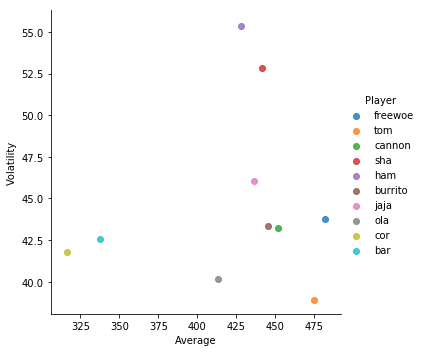

In [50]:
# fig, ax = plt.subplots(figsize = (10,9))
# sns.regplot(x = df["Average"], y = df["Volatility"], fit_reg=True)
x = sns.lmplot(fit_reg=False,x = "Average", y = "Volatility", hue = "Player", data = df)
plt.show()

### Win Probabilities

In [109]:
p_probs = {}

for player in range_sorted.keys():
    non_players = range_sorted.copy()
    del non_players[player]
    opps_dict = {}
    for p in non_players.keys():
        result = 0 
        for i in range(10000):
            play_rand = np.random.randint(range_sorted[player][0], range_sorted[player][1])
            opp_rand = np.random.randint(range_sorted[p][0], range_sorted[p][1])
            diff = play_rand - opp_rand 
            if diff > 0:
                result += 1
        perc = round(result/10000*100,2)
#         print("{} has a {}% chance of winning against {}".format(player, perc, p))
        opps_dict[p] = perc
    p_probs[player] = opps_dict
    
p_probs

{'ham': {'sha': 37.02,
  'jaja': 42.06,
  'freewoe': 10.12,
  'burrito': 33.63,
  'cannon': 28.18,
  'bar': 99.61,
  'cor': 100.0,
  'ola': 62.54,
  'tom': 12.45},
 'sha': {'ham': 61.8,
  'jaja': 54.58,
  'freewoe': 16.94,
  'burrito': 46.6,
  'cannon': 40.09,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 75.07,
  'tom': 21.11},
 'jaja': {'ham': 57.31,
  'sha': 44.24,
  'freewoe': 12.21,
  'burrito': 40.37,
  'cannon': 33.77,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 72.41,
  'tom': 15.21},
 'freewoe': {'ham': 89.42,
  'sha': 82.39,
  'jaja': 88.09,
  'burrito': 83.18,
  'cannon': 78.91,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 98.1,
  'tom': 58.76},
 'burrito': {'ham': 65.5,
  'sha': 52.22,
  'jaja': 59.4,
  'freewoe': 16.61,
  'cannon': 41.2,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 80.66,
  'tom': 21.15},
 'cannon': {'ham': 70.7,
  'sha': 58.25,
  'jaja': 65.47,
  'freewoe': 20.61,
  'burrito': 56.34,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 85.14,
  'tom': 26.0},
 'bar': {'ham': 0.22,
  

### Expected Wins for each Player

In [88]:
win = 1
num_match = 2
exp_dic = {x : 0 for x in p_probs.keys()} ## initialize dictionary

for player, opps in p_probs.items():
    exp = 0 
    for opp, prob in opps.items():
        exp += prob/100 *win * num_match
    exp_dic[player] = exp
        
exp_wins = sorted(exp_dic.items(), key = lambda exp_dic : exp_dic[1], reverse = True)

exp_wins

[('freewoe', 15.5448),
 ('tom', 14.7708),
 ('cannon', 11.638),
 ('burrito', 10.7564),
 ('sha', 10.387999999999998),
 ('jaja', 9.5344),
 ('ham', 8.480599999999999),
 ('ola', 6.467),
 ('bar', 1.4582),
 ('cor', 0.5182)]

In [100]:
## analysis done in midst of penultimate regular season matchup so let's compare what the 
## expected state of the Wins would be 

current_exp_state = []
for x in exp_wins:
    x = list(x)
    if x[1] > 2: ## preventing negative values for players: bar and cor
        x[1] = x[1] - 2
    current_exp_state.append([x[0], x[1]])
    
current_exp_state

[['freewoe', 13.5448],
 ['tom', 12.7708],
 ['cannon', 9.638],
 ['burrito', 8.7564],
 ['sha', 8.387999999999998],
 ['jaja', 7.5344],
 ['ham', 6.480599999999999],
 ['ola', 4.467],
 ['bar', 1.4582],
 ['cor', 0.5182]]

In [104]:
current_reality = [["freewoe", 13], ["tom", 12], ["cannon", 10], ["sha", 10], ["ham", 10], 
                   ["burrito", 9], ["jaja", 9], ["cor", 2], ["bar", 0]]
current_reality

[['freewoe', 13],
 ['tom', 12],
 ['cannon', 10],
 ['sha', 10],
 ['ham', 10],
 ['burrito', 9],
 ['jaja', 9],
 ['cor', 2],
 ['bar', 0]]

### Getting into the Playoffs

##### Only Top 6 Teams can Enter Playoffs 

Currently in the standings, the top 2 seeds have virtually guaranteed being in the playoffs. However, the next top 5 players are all either tied or separated from each other by one game. Therefore, since will be gunning for the last 4 spots, one person will have the misfortune of completely missing the playoffs

In [117]:
Ham = {"ham": ["jaja", "cannon"]}
Cannon = {"cannon": ["tom", "ham"]}
Jaja = {"jaja" : ["ham","freewoe"]}
Burr = {"burrito" : ["sha", "cor"]}
Sha = {"sha" : ["burrito", "ola"]}

rem = [Ham, Cannon, Jaja, Burr, Sha]

rem_probs = {}
for match in rem:
    for player, opps in match.items():
        opp_probs = []
        for i in opps:
            opp_probs.append(p_probs[player][i])
        rem_probs[player] = opp_probs

rem_probs

{'ham': [42.06, 28.18],
 'cannon': [26.0, 70.7],
 'jaja': [57.31, 12.21],
 'burrito': [52.22, 100.0],
 'sha': [46.6, 75.07]}

In [122]:
exp_rem_wins = {}

for player, probs in rem_probs.items():
    exp = 0
    for p in probs:
        exp += (p * 1 /100)
    exp_rem_wins[player] = exp
    
sorted(exp_rem_wins.items(), key = lambda exp_rem_wins: exp_rem_wins[1], reverse=True)

[('burrito', 1.5222),
 ('sha', 1.2167),
 ('cannon', 0.9670000000000001),
 ('ham', 0.7024),
 ('jaja', 0.6952)]

In [ ]:
f_range, t_range

In [ ]:
t_avg = list(df[df["Player"] == "tom"]["Average"])[0]
t_vol = list(df[df["Player"] == "tom"]["Volatility"])[0]

t_range = t_avg - t_vol, t_avg + t_vol
t_range

blah = 0
for i in range(100000):
    f_rand = np.random.randint(f_range[0], f_range[1])
    t_rand = np.random.randint(t_range[0], t_range[1])
    diff = f_rand - t_rand 
    if diff > 0: ## this means freewoe won as he had the greater number and the diff is positive 
        blah += 1 

print("Freewoe has a {}% chance of winning against Tom".format((blah/100000)*100))

1. how to rearrange dataframe columns pandas
2. How to populate specific index and col combo in dataframe
3. How to initialize empty dataframe 
4. How to use seaborn for scatterplots and condition on different players
5. How to sort a dictionary based on value
